## Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Upload Data Base

In [2]:
df_ord = pd.read_csv(r'base_publicaciones.csv')

In [3]:
df_ord.shape

(869470, 10)

In [4]:
df_ord.columns

Index(['ORD_ORDER_ID', 'ITE_ITEM_ID', 'CTLG_PROD_ID', 'ITE_BASE_CURRENT_PRICE',
       'flag_bad_user', 'is_buybox', 'has_bpp', 'has_claim_seller',
       'is_refund', 'bpp_cashout_final'],
      dtype='object')

In [5]:
df_ord.head()

,ORD_ORDER_ID,ITE_ITEM_ID,CTLG_PROD_ID,ITE_BASE_CURRENT_PRICE,flag_bad_user,is_buybox,has_bpp,has_claim_seller,is_refund,bpp_cashout_final
0,4577317619,1718794438,10608114,10.66,0,0,0,0,0.0,0.0
1,4542724158,1855945942,15305518,20.32,0,1,0,0,0.0,0.0
2,4603385249,1899937971,6078534,3.33,0,1,0,0,0.0,0.0
3,4588423792,1658897376,14214635,34.45,0,1,0,0,0.0,0.0
4,4546930678,1743613950,15786116,23.54,0,1,0,0,0.0,0.0


In [6]:
df_ord.dtypes

ORD_ORDER_ID                int64
ITE_ITEM_ID                 int64
CTLG_PROD_ID                int64
ITE_BASE_CURRENT_PRICE    float64
flag_bad_user               int64
is_buybox                   int64
has_bpp                     int64
has_claim_seller            int64
is_refund                 float64
bpp_cashout_final         float64
dtype: object

## Describe of the prices of the products

In [7]:
df_prod = df_ord[['CTLG_PROD_ID','ITE_ITEM_ID','ITE_BASE_CURRENT_PRICE']]

In [8]:
df_prod.sample(5)

,CTLG_PROD_ID,ITE_ITEM_ID,ITE_BASE_CURRENT_PRICE
384798,15279524,1743446299,34.96
718426,16211882,1774447996,225.55
792379,15534261,1829624713,63.61
485138,16034850,1864190613,79.30
283376,15144095,1737000909,11.76


In [9]:
df_prod.shape

(869470, 3)

In [10]:
gb=df_prod.groupby(['CTLG_PROD_ID'])
df_des=gb['ITE_BASE_CURRENT_PRICE'].describe()
df_des

,count,mean,std,min,25%,50%,75%,max
CTLG_PROD_ID,,,,,,,,
633,2.0,47.590000,1.183697e+01,39.22,43.4050,47.590,51.7750,55.96
5020,22.0,44.903636,4.364103e+00,42.09,42.5025,44.020,44.4025,57.98
802465,51.0,87.916471,6.482665e+01,7.83,7.8300,133.770,140.2100,156.84
802499,7.0,47.891429,1.512552e+00,47.02,47.0200,47.080,48.1650,50.77
802500,2.0,63.605000,1.248043e+01,54.78,59.1925,63.605,68.0175,72.43
...,...,...,...,...,...,...,...,...
18185023,4.0,88.860000,4.180000e+00,86.77,86.7700,86.770,88.8600,95.13
18186809,3.0,120.853333,1.144490e+01,109.22,115.2300,121.240,126.6700,132.10
18209455,40.0,588.700000,4.605405e-13,588.70,588.7000,588.700,588.7000,588.70


## Drop rows with NaN std

In [11]:
countNaN = df_des['std'].isna().sum()
countNaN

1073

In [12]:
df_des.dropna(subset = ['std'], inplace=True)

In [13]:
countNaN = df_des['std'].isna().sum()
countNaN

0

## Reset the index

In [14]:
df_des=df_des.reset_index()

In [15]:
df_des.head()

,CTLG_PROD_ID,count,mean,std,min,25%,50%,75%,max
0,633,2.0,47.590000,11.836968,39.22,43.4050,47.590,51.7750,55.96
1,5020,22.0,44.903636,4.364103,42.09,42.5025,44.020,44.4025,57.98
2,802465,51.0,87.916471,64.826648,7.83,7.8300,133.770,140.2100,156.84
3,802499,7.0,47.891429,1.512552,47.02,47.0200,47.080,48.1650,50.77
4,802500,2.0,63.605000,12.480435,54.78,59.1925,63.605,68.0175,72.43


In [16]:
df_des.shape

(8482, 9)

## Join the DFs by Product ID

In [17]:
df = pd.merge(left = df_des, right = df_ord,
                how = 'inner',
                left_on='CTLG_PROD_ID', right_on='CTLG_PROD_ID')

In [18]:
df.shape

(868397, 18)

In [19]:
df.columns

Index(['CTLG_PROD_ID', 'count', 'mean', 'std', 'min', '25%', '50%', '75%',
       'max', 'ORD_ORDER_ID', 'ITE_ITEM_ID', 'ITE_BASE_CURRENT_PRICE',
       'flag_bad_user', 'is_buybox', 'has_bpp', 'has_claim_seller',
       'is_refund', 'bpp_cashout_final'],
      dtype='object')

In [20]:
df.sample(5)

,CTLG_PROD_ID,count,mean,std,min,25%,50%,75%,max,ORD_ORDER_ID,ITE_ITEM_ID,ITE_BASE_CURRENT_PRICE,flag_bad_user,is_buybox,has_bpp,has_claim_seller,is_refund,bpp_cashout_final
555156,15794704,3818.0,10.177014,2.050464,5.35,8.49,9.81,11.36,21.34,4608109957,1692777822,9.81,0,0,0,0,0.0,0.0
657219,16008826,285.0,294.018807,9.575955,284.44,284.44,298.18,298.18,357.23,4578074751,1757018335,298.18,0,1,0,0,0.0,0.0
820108,17359552,124.0,28.186935,4.051193,21.38,24.49,28.79,31.24,48.88,4560651562,1878318731,31.24,0,1,0,0,0.0,0.0
188826,8859356,3677.0,11.633565,2.647621,5.88,9.63,11.20,14.18,84.96,4572640863,1680705699,14.18,0,1,0,0,0.0,0.0
362135,15123398,424.0,198.570778,23.580896,127.30,184.51,186.29,235.56,249.23,4568324771,1417809512,184.51,0,1,0,0,0.0,0.0


## Order weight on products

In [21]:
df['weight'] = 1/df[['count']]

In [22]:
df.sample(5)

,CTLG_PROD_ID,count,mean,std,min,25%,50%,75%,max,ORD_ORDER_ID,ITE_ITEM_ID,ITE_BASE_CURRENT_PRICE,flag_bad_user,is_buybox,has_bpp,has_claim_seller,is_refund,bpp_cashout_final,weight
219851,9876143,50.0,138.399800,12.068063,123.63,131.64,131.64,143.13,165.93,4549011676,1507606480,165.93,0,0,0,0,0.0,0.0,0.020000
431208,15306371,1757.0,44.789516,2.936990,33.32,43.19,43.23,47.63,58.63,4601555238,1650307462,47.63,0,1,0,0,0.0,0.0,0.000569
431522,15306371,1757.0,44.789516,2.936990,33.32,43.19,43.23,47.63,58.63,4560641581,1652838710,43.23,0,1,0,0,0.0,0.0,0.000569
808015,17109416,457.0,88.709759,9.138474,77.31,81.16,83.23,96.52,120.08,4568628066,1885007221,99.21,0,1,0,0,0.0,0.0,0.002188
846428,17487208,80.0,554.637375,114.279543,387.40,480.74,503.36,725.23,786.20,4579970232,1888791557,434.70,1,1,0,0,0.0,0.0,0.012500


In [23]:
df.columns

Index(['CTLG_PROD_ID', 'count', 'mean', 'std', 'min', '25%', '50%', '75%',
       'max', 'ORD_ORDER_ID', 'ITE_ITEM_ID', 'ITE_BASE_CURRENT_PRICE',
       'flag_bad_user', 'is_buybox', 'has_bpp', 'has_claim_seller',
       'is_refund', 'bpp_cashout_final', 'weight'],
      dtype='object')

## Bad orders

In [24]:
df['bad_order'] = df.apply(lambda x: 1 if x['flag_bad_user'] == 1 or x['has_bpp'] == 1 or x['has_claim_seller'] == 1 or x['is_refund'] == 1 or x['bpp_cashout_final'] > 0 else 0, axis=1)


In [25]:
df.sample(5)

,CTLG_PROD_ID,count,mean,std,min,25%,50%,75%,max,ORD_ORDER_ID,ITE_ITEM_ID,ITE_BASE_CURRENT_PRICE,flag_bad_user,is_buybox,has_bpp,has_claim_seller,is_refund,bpp_cashout_final,weight,bad_order
74307,6229646,486.0,22.667798,5.483216,17.65,17.650,23.26,23.28,41.19,4551603391,1876359684,23.26,0,1,0,0,0.0,0.0,0.002058,0
248213,11063204,214.0,63.523738,4.428152,26.91,62.410,62.54,63.69,105.12,4543666141,1666631885,65.99,0,0,0,0,0.0,0.0,0.004673,0
480361,15542394,83.0,38.793976,4.778136,32.33,37.100,37.10,42.40,57.11,4596638951,1718600146,49.28,0,1,0,0,0.0,0.0,0.012048,0
629682,15983554,292.0,34.627500,12.558431,19.34,27.745,32.95,36.84,155.45,4605883885,1829017281,32.95,1,0,0,0,0.0,0.0,0.003425,1
30027,6078536,1506.0,6.009402,2.329908,2.11,4.770,4.95,7.05,59.23,4592883006,1854077535,7.05,0,1,0,0,0.0,0.0,0.000664,0


In [26]:
df.columns

Index(['CTLG_PROD_ID', 'count', 'mean', 'std', 'min', '25%', '50%', '75%',
       'max', 'ORD_ORDER_ID', 'ITE_ITEM_ID', 'ITE_BASE_CURRENT_PRICE',
       'flag_bad_user', 'is_buybox', 'has_bpp', 'has_claim_seller',
       'is_refund', 'bpp_cashout_final', 'weight', 'bad_order'],
      dtype='object')

# Base on the Price_Range

## Create columns flag low_price for those items with price below the 25%

In [27]:
df['Low25_Price'] = df.apply(lambda x: 1 if x['25%'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)

## Create columns flag middle_price for items with price below the 75% and over the  25%

In [28]:
df['Middle_Price'] = df.apply(lambda x: 1 if x['75%'] >= x['ITE_BASE_CURRENT_PRICE'] and x['25%'] <= x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)


## Create column flag high_price for those items with price over the 75%

In [29]:
df['High75_Price'] = df.apply(lambda x: 1 if x['75%'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)

## Create column flag price_range

In [30]:
df['Price_Range'] = df.apply(lambda x:'low_25' if x['Low25_Price']== 1 else('high_75' if  x['High75_Price']==1  else 'middle'),axis=1)


In [31]:
df.columns

Index(['CTLG_PROD_ID', 'count', 'mean', 'std', 'min', '25%', '50%', '75%',
       'max', 'ORD_ORDER_ID', 'ITE_ITEM_ID', 'ITE_BASE_CURRENT_PRICE',
       'flag_bad_user', 'is_buybox', 'has_bpp', 'has_claim_seller',
       'is_refund', 'bpp_cashout_final', 'weight', 'bad_order', 'Low25_Price',
       'Middle_Price', 'High75_Price', 'Price_Range'],
      dtype='object')

In [32]:
df.sample(5)

,CTLG_PROD_ID,count,mean,std,min,25%,50%,75%,max,ORD_ORDER_ID,...,has_bpp,has_claim_seller,is_refund,bpp_cashout_final,weight,bad_order,Low25_Price,Middle_Price,High75_Price,Price_Range
360606,15121865,1278.0,158.815493,12.099898,123.84,150.80,150.80,169.24,176.47,4579395380,...,0,0,0.0,0.0,0.000782,0,0,1,0,middle
712970,16141900,6299.0,24.180751,5.086806,4.04,21.02,23.06,27.07,95.65,4566801307,...,0,0,0.0,0.0,0.000159,0,1,0,0,low_25
254708,11328355,972.0,126.038354,285.389288,24.20,25.58,25.58,32.57,954.50,4554654102,...,0,0,0.0,0.0,0.001029,0,0,1,0,middle
396871,15244643,290.0,227.238828,17.232721,185.75,220.00,220.25,229.47,283.21,4575575099,...,0,0,0.0,0.0,0.003448,0,0,1,0,middle
714723,16141900,6299.0,24.180751,5.086806,4.04,21.02,23.06,27.07,95.65,4551745861,...,0,0,0.0,0.0,0.000159,0,0,0,1,high_75


## Distribution Bad Orders

In [33]:
df_1=df[['Price_Range','bad_order','ORD_ORDER_ID']]

In [34]:
gb1=df_1.groupby(['Price_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['Price_Range','ORD_ORDER_ID']].groupby(['Price_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['Price_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='Price_Range', right_on='Price_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,Price_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_75,0,120675,140534,85.9
1,high_75,1,19859,140534,14.1
2,low_25,0,100553,126987,79.2
3,low_25,1,26434,126987,20.8
4,middle,0,523584,600876,87.1
5,middle,1,77292,600876,12.9


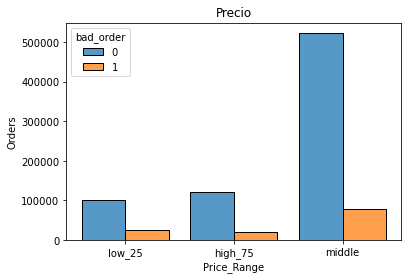

In [35]:
sns.histplot(
            data=df_1,
            x="Price_Range",
            hue="bad_order",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Bad Users

In [36]:
df_1=df[['Price_Range','flag_bad_user','ORD_ORDER_ID']]

In [37]:
gb1=df_1.groupby(['Price_Range','flag_bad_user']).count()
gb1=gb1.reset_index()

gb2=gb1[['Price_Range','ORD_ORDER_ID']].groupby(['Price_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['Price_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='Price_Range', right_on='Price_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,Price_Range,flag_bad_user,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_75,0,136138,140534,96.9
1,high_75,1,4396,140534,3.1
2,low_25,0,119663,126987,94.2
3,low_25,1,7324,126987,5.8
4,middle,0,582734,600876,97.0
5,middle,1,18142,600876,3.0


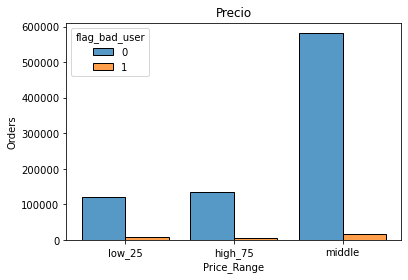

In [38]:
sns.histplot(
            data=df_1,
            x="Price_Range",
            hue="flag_bad_user",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Has CashOut

In [39]:
df_1=df[['Price_Range','bpp_cashout_final','ORD_ORDER_ID']]
df_1['has_co'] = df_1.apply(lambda x: 1 if x['bpp_cashout_final'] > 0 else 0, axis=1)
df_1=df_1[['Price_Range','has_co','ORD_ORDER_ID']]

<ipython-input-39-239d2c268fe3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['has_co'] = df_1.apply(lambda x: 1 if x['bpp_cashout_final'] > 0 else 0, axis=1)


In [40]:
gb1=df_1.groupby(['Price_Range','has_co']).count()
gb1=gb1.reset_index()

gb2=gb1[['Price_Range','ORD_ORDER_ID']].groupby(['Price_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['Price_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='Price_Range', right_on='Price_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,Price_Range,has_co,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_75,0,139690,140534,99.4
1,high_75,1,844,140534,0.6
2,low_25,0,125609,126987,98.9
3,low_25,1,1378,126987,1.1
4,middle,0,597099,600876,99.4
5,middle,1,3777,600876,0.6


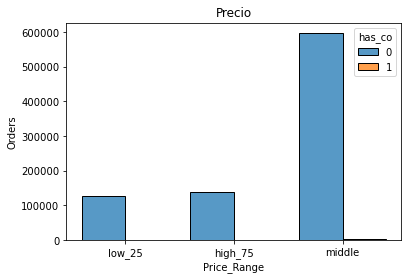

In [41]:
sns.histplot(
            data=df_1,
            x="Price_Range",
            hue="has_co",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Has Claim

In [42]:
df_1=df[['Price_Range','has_claim_seller','ORD_ORDER_ID']]

In [43]:
gb1=df_1.groupby(['Price_Range','has_claim_seller']).count()
gb1=gb1.reset_index()

gb2=gb1[['Price_Range','ORD_ORDER_ID']].groupby(['Price_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['Price_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='Price_Range', right_on='Price_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,Price_Range,has_claim_seller,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_75,0,127238,140534,90.5
1,high_75,1,13296,140534,9.5
2,low_25,0,110606,126987,87.1
3,low_25,1,16381,126987,12.9
4,middle,0,551372,600876,91.8
5,middle,1,49504,600876,8.2


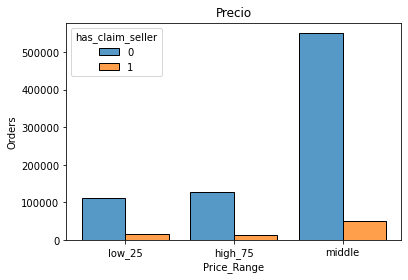

In [44]:
sns.histplot(
            data=df_1,
            x="Price_Range",
            hue="has_claim_seller",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution is Refund

In [45]:
df_1=df[['Price_Range','is_refund','ORD_ORDER_ID']]

In [46]:
gb1=df_1.groupby(['Price_Range','is_refund']).count()
gb1=gb1.reset_index()

gb2=gb1[['Price_Range','ORD_ORDER_ID']].groupby(['Price_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['Price_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='Price_Range', right_on='Price_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,Price_Range,is_refund,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_75,0.0,127272,140533,90.6
1,high_75,1.0,13261,140533,9.4
2,low_25,0.0,109284,126978,86.1
3,low_25,1.0,17694,126978,13.9
4,middle,0.0,551477,600874,91.8
5,middle,1.0,49397,600874,8.2


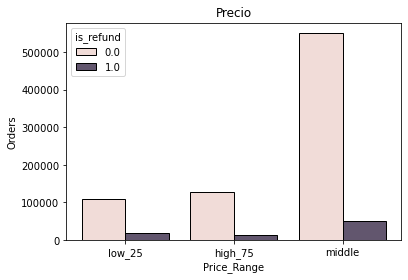

In [47]:
sns.histplot(
            data=df_1,
            x="Price_Range",
            hue="is_refund",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

# Base on the STD_Range

## Create DF STD

In [52]:
df_std = df_des[['CTLG_PROD_ID','mean']]
df_std['STDx1'] = df_des['std']
df_std['STDx1.25'] = df_des['std']*1.25
df_std['STDx1.5'] = df_des['std']*1.5
df_std['STDx1.75'] = df_des['std']*1.75
df_std['STDx2'] = df_des['std']*2
df_std['STDx2.25'] = df_des['std']*2.25
df_std['STDx2.5'] = df_des['std']*2.5
df_std['STDx2.75'] = df_des['std']*2.75
df_std['STDx3'] = df_des['std']*3
df_std=df_std.round(decimals=2)

<ipython-input-52-01a83c4a6b8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_std['STDx1'] = df_des['std']
<ipython-input-52-01a83c4a6b8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_std['STDx1.25'] = df_des['std']*1.25
<ipython-input-52-01a83c4a6b8b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [53]:
df_std.sample(5)

,CTLG_PROD_ID,mean,STDx1,STDx1.25,STDx1.5,STDx1.75,STDx2,STDx2.25,STDx2.5,STDx2.75,STDx3
3391,13836839,628.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1450,7974254,39.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6492,15908183,32.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2601,10493631,149.15,14.46,18.08,21.69,25.31,28.92,32.54,36.16,39.77,43.39
8167,17379782,115.11,11.15,13.94,16.72,19.51,22.30,25.09,27.87,30.66,33.45


In [54]:
df.columns

Index(['CTLG_PROD_ID', 'count', 'mean', 'std', 'min', '25%', '50%', '75%',
       'max', 'ORD_ORDER_ID', 'ITE_ITEM_ID', 'ITE_BASE_CURRENT_PRICE',
       'flag_bad_user', 'is_buybox', 'has_bpp', 'has_claim_seller',
       'is_refund', 'bpp_cashout_final', 'weight', 'bad_order', 'Low25_Price',
       'Middle_Price', 'High75_Price', 'Price_Range'],
      dtype='object')

## Join the DF STD with the rest of the info

In [55]:
df_red = df[['CTLG_PROD_ID','ORD_ORDER_ID','ITE_ITEM_ID','ITE_BASE_CURRENT_PRICE','flag_bad_user','has_bpp','has_claim_seller','is_refund','bpp_cashout_final','bad_order']]
df_s = pd.merge(left = df_red, right = df_std,
                how = 'inner',
                left_on='CTLG_PROD_ID', right_on='CTLG_PROD_ID')

In [56]:
df_s.sample(5)

,CTLG_PROD_ID,ORD_ORDER_ID,ITE_ITEM_ID,ITE_BASE_CURRENT_PRICE,flag_bad_user,has_bpp,has_claim_seller,is_refund,bpp_cashout_final,bad_order,mean,STDx1,STDx1.25,STDx1.5,STDx1.75,STDx2,STDx2.25,STDx2.5,STDx2.75,STDx3
207273,9254325,4550601648,1438109196,13.43,0,1,1,1.0,0.0,1,12.91,3.21,4.01,4.81,5.61,6.42,7.22,8.02,8.82,9.62
496452,15579078,4584244148,1064887930,40.22,0,0,0,0.0,0.0,0,39.26,2.79,3.49,4.18,4.88,5.58,6.28,6.97,7.67,8.37
741871,16211882,4552519906,1874170113,159.36,0,1,1,1.0,0.0,1,220.89,13.58,16.97,20.36,23.76,27.15,30.55,33.94,37.34,40.73
628596,15981655,4589033703,1745256360,76.36,0,0,0,0.0,0.0,0,76.54,1.42,1.78,2.13,2.49,2.84,3.20,3.55,3.91,4.26
46841,6110140,4546612338,1815803376,10.18,0,0,0,0.0,0.0,0,14.08,5.17,6.47,7.76,9.05,10.35,11.64,12.93,14.23,15.52


In [57]:
df_s.columns

Index(['CTLG_PROD_ID', 'ORD_ORDER_ID', 'ITE_ITEM_ID', 'ITE_BASE_CURRENT_PRICE',
       'flag_bad_user', 'has_bpp', 'has_claim_seller', 'is_refund',
       'bpp_cashout_final', 'bad_order', 'mean', 'STDx1', 'STDx1.25',
       'STDx1.5', 'STDx1.75', 'STDx2', 'STDx2.25', 'STDx2.5', 'STDx2.75',
       'STDx3'],
      dtype='object')

## Create column flag below 2 STD

In [58]:
df_s['media-1std'] = df_s['mean'] - df_s['STDx1']
df_s['media-1.25std'] = df_s['mean'] - df_s['STDx1.25']
df_s['media-1.5std'] = df_s['mean'] - df_s['STDx1.5']
df_s['media-1.75std'] = df_s['mean'] - df_s['STDx1.75']
df_s['media-2std'] = df_s['mean'] - df_s['STDx2']
df_s['media-2.25std'] = df_s['mean'] - df_s['STDx2.25']
df_s['media-2.5std'] = df_s['mean'] - df_s['STDx2.5']
df_s['media-2.75std'] = df_s['mean'] - df_s['STDx2.75']
df_s['media-3std'] = df_s['mean'] - df_s['STDx3']

In [59]:
df_s['Low_1STD'] = df_s.apply(lambda x: 1 if x['media-1std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_1.25STD'] = df_s.apply(lambda x: 1 if x['media-1.25std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_1.5STD'] = df_s.apply(lambda x: 1 if x['media-1.5std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_1.75STD'] = df_s.apply(lambda x: 1 if x['media-1.75std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_2STD'] = df_s.apply(lambda x: 1 if x['media-2std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_2.25STD'] = df_s.apply(lambda x: 1 if x['media-2.25std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_2.5STD'] = df_s.apply(lambda x: 1 if x['media-2.5std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_2.75STD'] = df_s.apply(lambda x: 1 if x['media-2.75std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_3STD'] = df_s.apply(lambda x: 1 if x['media-3std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)

## Create column flag over 2 STD

In [60]:
df_s['media+1std'] = df_s['mean'] + df_s['STDx1']
df_s['media+1.25std'] = df_s['mean'] + df_s['STDx1.25']
df_s['media+1.5std'] = df_s['mean'] + df_s['STDx1.5']
df_s['media+1.75std'] = df_s['mean'] + df_s['STDx1.75']
df_s['media+2std'] = df_s['mean'] + df_s['STDx2']
df_s['media+2.25std'] = df_s['mean'] + df_s['STDx2.25']
df_s['media+2.5std'] = df_s['mean'] + df_s['STDx2.5']
df_s['media+2.75std'] = df_s['mean'] + df_s['STDx2.75']
df_s['media+3std'] = df_s['mean'] + df_s['STDx3']

In [61]:
df_s['High_1STD'] = df_s.apply(lambda x: 1 if x['media+1std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_1.25STD'] = df_s.apply(lambda x: 1 if x['media+1.25std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_1.5STD'] = df_s.apply(lambda x: 1 if x['media+1.5std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_1.75STD'] = df_s.apply(lambda x: 1 if x['media+1.75std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_2STD'] = df_s.apply(lambda x: 1 if x['media+2std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_2.25STD'] = df_s.apply(lambda x: 1 if x['media+2.25std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_2.5STD'] = df_s.apply(lambda x: 1 if x['media+2.5std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_2.75STD'] = df_s.apply(lambda x: 1 if x['media+2.75std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_3STD'] = df_s.apply(lambda x: 1 if x['media+3std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)

## Create column flag STD_range

In [62]:
df_s['1STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_1STD']== 1 else('high_STD' if  x['High_1STD']==1  else 'middle_STD'),axis=1)
df_s['1.25STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_1.25STD']== 1 else('high_STD' if  x['High_1.25STD']==1  else 'middle_STD'),axis=1)
df_s['1.5STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_1.5STD']== 1 else('high_STD' if  x['High_1.5STD']==1  else 'middle_STD'),axis=1)
df_s['1.75STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_1.75STD']== 1 else('high_STD' if  x['High_1.75STD']==1  else 'middle_STD'),axis=1)
df_s['2STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_2STD']== 1 else('high_STD' if  x['High_2STD']==1  else 'middle_STD'),axis=1)
df_s['2.25STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_2.25STD']== 1 else('high_STD' if  x['High_2.25STD']==1  else 'middle_STD'),axis=1)
df_s['2.5STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_2.5STD']== 1 else('high_STD' if  x['High_2.5STD']==1  else 'middle_STD'),axis=1)
df_s['2.75STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_2.75STD']== 1 else('high_STD' if  x['High_2.75STD']==1  else 'middle_STD'),axis=1)
df_s['3STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_3STD']== 1 else('high_STD' if  x['High_3STD']==1  else 'middle_STD'),axis=1)


In [63]:
df_s.columns

Index(['CTLG_PROD_ID', 'ORD_ORDER_ID', 'ITE_ITEM_ID', 'ITE_BASE_CURRENT_PRICE',
       'flag_bad_user', 'has_bpp', 'has_claim_seller', 'is_refund',
       'bpp_cashout_final', 'bad_order', 'mean', 'STDx1', 'STDx1.25',
       'STDx1.5', 'STDx1.75', 'STDx2', 'STDx2.25', 'STDx2.5', 'STDx2.75',
       'STDx3', 'media-1std', 'media-1.25std', 'media-1.5std', 'media-1.75std',
       'media-2std', 'media-2.25std', 'media-2.5std', 'media-2.75std',
       'media-3std', 'Low_1STD', 'Low_1.25STD', 'Low_1.5STD', 'Low_1.75STD',
       'Low_2STD', 'Low_2.25STD', 'Low_2.5STD', 'Low_2.75STD', 'Low_3STD',
       'media+1std', 'media+1.25std', 'media+1.5std', 'media+1.75std',
       'media+2std', 'media+2.25std', 'media+2.5std', 'media+2.75std',
       'media+3std', 'High_1STD', 'High_1.25STD', 'High_1.5STD',
       'High_1.75STD', 'High_2STD', 'High_2.25STD', 'High_2.5STD',
       'High_2.75STD', 'High_3STD', '1STD_Range', '1.25STD_Range',
       '1.5STD_Range', '1.75STD_Range', '2STD_Range', '2.25STD_R

In [64]:
df_s.sample(5)

,CTLG_PROD_ID,ORD_ORDER_ID,ITE_ITEM_ID,ITE_BASE_CURRENT_PRICE,flag_bad_user,has_bpp,has_claim_seller,is_refund,bpp_cashout_final,bad_order,...,High_3STD,1STD_Range,1.25STD_Range,1.5STD_Range,1.75STD_Range,2STD_Range,2.25STD_Range,2.5STD_Range,2.75STD_Range,3STD_Range
671951,16052515,4566558258,1857366024,31.21,0,0,0,0.0,0.0,0,...,0,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD
603999,15949974,4591203013,1806703656,204.26,1,0,0,0.0,0.0,1,...,0,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD
481826,15549567,4568946034,1646050550,33.37,0,0,0,0.0,0.0,0,...,0,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD
561257,15808246,4548799608,1619696016,153.31,0,0,0,0.0,0.0,0,...,0,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD
536242,15787467,4602803085,1899664854,75.35,0,0,0,0.0,0.0,0,...,0,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD


In [65]:
df_2=df_s[['1STD_Range','1.25STD_Range','1.5STD_Range','1.75STD_Range','2STD_Range','2.25STD_Range','2.5STD_Range','2.75STD_Range','3STD_Range','bad_order','ORD_ORDER_ID']]
df_2.sample(5)

,1STD_Range,1.25STD_Range,1.5STD_Range,1.75STD_Range,2STD_Range,2.25STD_Range,2.5STD_Range,2.75STD_Range,3STD_Range,bad_order,ORD_ORDER_ID
740262,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,0,4594810207
636409,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,0,4573478691
329024,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,0,4604903233
805928,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,1,4555961556
603555,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,0,4600655687


## Distribution Bad Orders by different STD segments

In [66]:
df_1=df_s[['1STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['1STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['1STD_Range','ORD_ORDER_ID']].groupby(['1STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['1STD_Range','TOTAL']]

ds_1 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='1STD_Range', right_on='1STD_Range')

ds_1['Dis.[%]']=(ds_1['ORD_ORDER_ID']/ds_1['TOTAL'])*100
ds_1['Dis.[%]']=ds_1['Dis.[%]'].round(decimals=1)

ds_1=ds_1[ds_1['bad_order']==1]
ds_1=ds_1[ds_1['1STD_Range']=='low_STD']

In [67]:
df_1=df_s[['1.25STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['1.25STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['1.25STD_Range','ORD_ORDER_ID']].groupby(['1.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['1.25STD_Range','TOTAL']]

ds_125 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='1.25STD_Range', right_on='1.25STD_Range')

ds_125['Dis.[%]']=(ds_125['ORD_ORDER_ID']/ds_125['TOTAL'])*100
ds_125['Dis.[%]']=ds_125['Dis.[%]'].round(decimals=1)

ds_125=ds_125[ds_125['bad_order']==1]
ds_125=ds_125[ds_125['1.25STD_Range']=='low_STD']

In [68]:
df_1=df_s[['1.5STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['1.5STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['1.5STD_Range','ORD_ORDER_ID']].groupby(['1.5STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['1.5STD_Range','TOTAL']]

ds_15 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='1.5STD_Range', right_on='1.5STD_Range')

ds_15['Dis.[%]']=(ds_15['ORD_ORDER_ID']/ds_15['TOTAL'])*100
ds_15['Dis.[%]']=ds_15['Dis.[%]'].round(decimals=1)

ds_15=ds_15[ds_15['bad_order']==1]
ds_15=ds_15[ds_15['1.5STD_Range']=='low_STD']

In [69]:
df_1=df_s[['1.75STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['1.75STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['1.75STD_Range','ORD_ORDER_ID']].groupby(['1.75STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['1.75STD_Range','TOTAL']]

ds_175 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='1.75STD_Range', right_on='1.75STD_Range')

ds_175['Dis.[%]']=(ds_175['ORD_ORDER_ID']/ds_175['TOTAL'])*100
ds_175['Dis.[%]']=ds_175['Dis.[%]'].round(decimals=1)

ds_175=ds_175[ds_175['bad_order']==1]
ds_175=ds_175[ds_175['1.75STD_Range']=='low_STD']

In [70]:
df_1=df_s[['2STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['2STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['2STD_Range','ORD_ORDER_ID']].groupby(['2STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2STD_Range','TOTAL']]

ds_2 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2STD_Range', right_on='2STD_Range')

ds_2['Dis.[%]']=(ds_2['ORD_ORDER_ID']/ds_2['TOTAL'])*100
ds_2['Dis.[%]']=ds_2['Dis.[%]'].round(decimals=1)

ds_2=ds_2[ds_2['bad_order']==1]
ds_2=ds_2[ds_2['2STD_Range']=='low_STD']

In [71]:
df_1=df_s[['2.25STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['2.25STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.25STD_Range','ORD_ORDER_ID']].groupby(['2.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.25STD_Range','TOTAL']]

ds_225 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.25STD_Range', right_on='2.25STD_Range')

ds_225['Dis.[%]']=(ds_225['ORD_ORDER_ID']/ds_225['TOTAL'])*100
ds_225['Dis.[%]']=ds_225['Dis.[%]'].round(decimals=1)

ds_225=ds_225[ds_225['bad_order']==1]
ds_225=ds_225[ds_225['2.25STD_Range']=='low_STD']

In [72]:
df_1=df_s[['2.5STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['2.5STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.5STD_Range','ORD_ORDER_ID']].groupby(['2.5STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.5STD_Range','TOTAL']]

ds_25 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.5STD_Range', right_on='2.5STD_Range')

ds_25['Dis.[%]']=(ds_25['ORD_ORDER_ID']/ds_25['TOTAL'])*100
ds_25['Dis.[%]']=ds_25['Dis.[%]'].round(decimals=1)

ds_25=ds_25[ds_25['bad_order']==1]
ds_25=ds_25[ds_25['2.5STD_Range']=='low_STD']

In [73]:
df_1=df_s[['2.75STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['2.75STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.75STD_Range','ORD_ORDER_ID']].groupby(['2.75STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.75STD_Range','TOTAL']]

ds_275 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.75STD_Range', right_on='2.75STD_Range')

ds_275['Dis.[%]']=(ds_275['ORD_ORDER_ID']/ds_275['TOTAL'])*100
ds_275['Dis.[%]']=ds_275['Dis.[%]'].round(decimals=1)

ds_275=ds_275[ds_275['bad_order']==1]
ds_275=ds_275[ds_275['2.75STD_Range']=='low_STD']

In [74]:
df_1=df_s[['3STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['3STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['3STD_Range','ORD_ORDER_ID']].groupby(['3STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['3STD_Range','TOTAL']]

ds_3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='3STD_Range', right_on='3STD_Range')

ds_3['Dis.[%]']=(ds_3['ORD_ORDER_ID']/ds_3['TOTAL'])*100
ds_3['Dis.[%]']=ds_3['Dis.[%]'].round(decimals=1)

ds_3=ds_3[ds_3['bad_order']==1]
ds_3=ds_3[ds_3['3STD_Range']=='low_STD']

In [75]:
ds_1

,1STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
3,low_STD,1,13009,59974,21.7


In [76]:
ds_125

,1.25STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
3,low_STD,1,8395,33889,24.8


In [77]:
ds_15

,1.5STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
3,low_STD,1,5528,19755,28.0


In [78]:
ds_175

,1.75STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
3,low_STD,1,4040,12347,32.7


In [79]:
ds_2

,2STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
3,low_STD,1,2929,8492,34.5


In [80]:
ds_225

,2.25STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
3,low_STD,1,2249,6012,37.4


In [81]:
ds_25

,2.5STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
3,low_STD,1,1807,4324,41.8


In [82]:
ds_275

,2.75STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
3,low_STD,1,1489,3248,45.8


In [83]:
ds_3

,3STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
3,low_STD,1,1279,2537,50.4


## Distribution Bad Orders

In [93]:
df_1=df_s[['2.25STD_Range','bad_order','ORD_ORDER_ID']]

In [94]:
gb1=df_1.groupby(['2.25STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.25STD_Range','ORD_ORDER_ID']].groupby(['2.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.25STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.25STD_Range', right_on='2.25STD_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,2.25STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_STD,0,16172,19159,84.4
1,high_STD,1,2987,19159,15.6
2,low_STD,0,3763,6012,62.6
3,low_STD,1,2249,6012,37.4
4,middle_STD,0,724877,843226,86.0
5,middle_STD,1,118349,843226,14.0


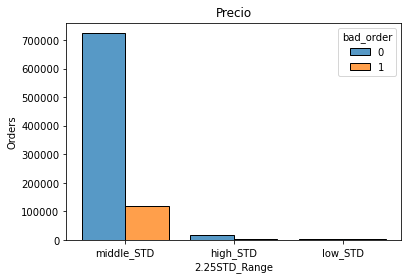

In [97]:
sns.histplot(
            data=df_1,
            x="2.25STD_Range",
            hue="bad_order",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Bad Users

In [98]:
df_1=df_s[['2.25STD_Range','flag_bad_user','ORD_ORDER_ID']]

In [99]:
gb1=df_1.groupby(['2.25STD_Range','flag_bad_user']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.25STD_Range','ORD_ORDER_ID']].groupby(['2.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.25STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.25STD_Range', right_on='2.25STD_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,2.25STD_Range,flag_bad_user,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_STD,0,18573,19159,96.9
1,high_STD,1,586,19159,3.1
2,low_STD,0,5697,6012,94.8
3,low_STD,1,315,6012,5.2
4,middle_STD,0,814265,843226,96.6
5,middle_STD,1,28961,843226,3.4


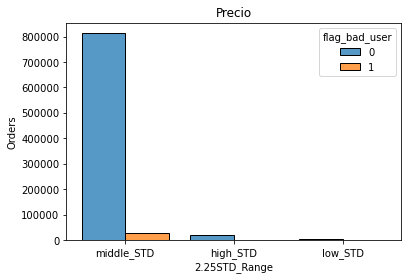

In [102]:
sns.histplot(
            data=df_1,
            x="2.25STD_Range",
            hue="flag_bad_user",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Has CashOut

In [103]:
df_1=df_s[['2.25STD_Range','bpp_cashout_final','ORD_ORDER_ID']]
df_1['has_co'] = df_1.apply(lambda x: 1 if x['bpp_cashout_final'] > 0 else 0, axis=1)
df_1=df_1[['2.25STD_Range','has_co','ORD_ORDER_ID']]

<ipython-input-103-3a510db3b053>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['has_co'] = df_1.apply(lambda x: 1 if x['bpp_cashout_final'] > 0 else 0, axis=1)


In [104]:
gb1=df_1.groupby(['2.25STD_Range','has_co']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.25STD_Range','ORD_ORDER_ID']].groupby(['2.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.25STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.25STD_Range', right_on='2.25STD_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,2.25STD_Range,has_co,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_STD,0,19074,19159,99.6
1,high_STD,1,85,19159,0.4
2,low_STD,0,5888,6012,97.9
3,low_STD,1,124,6012,2.1
4,middle_STD,0,837436,843226,99.3
5,middle_STD,1,5790,843226,0.7


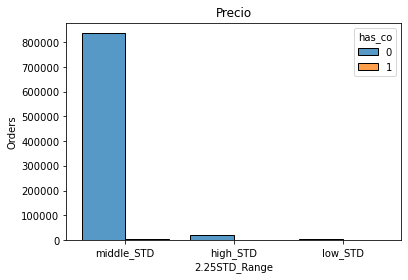

In [105]:
sns.histplot(
            data=df_1,
            x="2.25STD_Range",
            hue="has_co",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Has Claim

In [107]:
df_1=df_s[['2.25STD_Range','has_claim_seller','ORD_ORDER_ID']]

In [108]:
gb1=df_1.groupby(['2.25STD_Range','has_claim_seller']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.25STD_Range','ORD_ORDER_ID']].groupby(['2.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.25STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.25STD_Range', right_on='2.25STD_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,2.25STD_Range,has_claim_seller,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_STD,0,17069,19159,89.1
1,high_STD,1,2090,19159,10.9
2,low_STD,0,4337,6012,72.1
3,low_STD,1,1675,6012,27.9
4,middle_STD,0,767810,843226,91.1
5,middle_STD,1,75416,843226,8.9


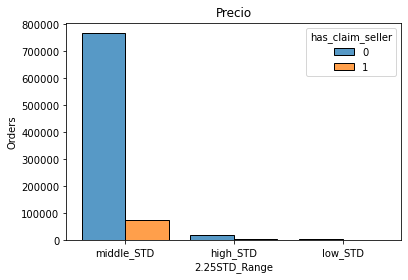

In [109]:
sns.histplot(
            data=df_1,
            x="2.25STD_Range",
            hue="has_claim_seller",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution is Refund

In [110]:
df_1=df_s[['2.25STD_Range','is_refund','ORD_ORDER_ID']]

In [111]:
gb1=df_1.groupby(['2.25STD_Range','is_refund']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.25STD_Range','ORD_ORDER_ID']].groupby(['2.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.25STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.25STD_Range', right_on='2.25STD_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,2.25STD_Range,is_refund,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_STD,0.0,17148,19159,89.5
1,high_STD,1.0,2011,19159,10.5
2,low_STD,0.0,4047,6011,67.3
3,low_STD,1.0,1964,6011,32.7
4,middle_STD,0.0,766838,843215,90.9
5,middle_STD,1.0,76377,843215,9.1


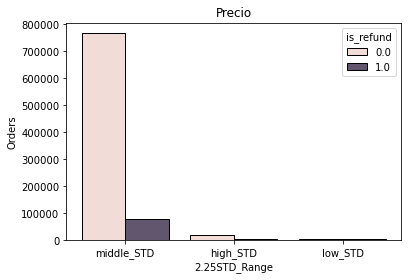

In [112]:
sns.histplot(
            data=df_1,
            x="2.25STD_Range",
            hue="is_refund",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Export the products IDs

In [ ]:
#ID=df['CTLG_PROD_ID']
#ID.to_csv(r'products_id.csv', index = False)

In [ ]:
#LAMBDA CON AND
#df_ratios['extremos']= df_ratios.apply(lambda x: 'caso1' if x['ratio_recla_1m']> 0.3 and x['ratio_cashout_1m']> 0.3 and x['ratio_ref_1m']> 0.3 and x['ratio_claims_1m']> 0.3 else 'no',axis=1)


In [ ]:
#LAMDA CON IF ANIDADO
#df['adicionales']= df.apply(lambda x: 'caso1' if x['gmv_90d']<= 0 else('caso2' if  x['gmv_30d']<=0  else 'no'),axis=1)
